<a href="https://colab.research.google.com/github/akbarehsani/backsample2/blob/master/imgclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

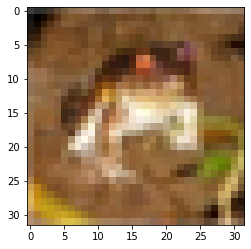

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.constraints import maxnorm
from sklearn.preprocessing import OneHotEncoder
from keras.datasets import cifar10
from keras.utils import np_utils
from matplotlib import pyplot as plt
(X_train,y_train),(X_test,y_test)=cifar10.load_data()
plt.imshow(X_train[0])
from keras.models import Sequential,load_model
from keras.layers import Conv2D,MaxPool2D,Dense,Dropout,Flatten,BatchNormalization
from sklearn import metrics




In [4]:
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')
X_train=X_train/255.0
X_test=X_test/255.0

In [5]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)


In [6]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [7]:
class_num=y_test.shape[1]
print(class_num)
print(X_train.shape[1:])

10
(32, 32, 3)


In [8]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',input_shape=X_train.shape[1:],activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(64,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(class_num,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(class_num,activation='softmax'))




In [9]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 64)        0         
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 64)       256       
 hNormalization)                                        

In [10]:
history=model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=20,batch_size=100)

Epoch 1/20
500/500 [==============================] - 458s 913ms/step - loss: 1.7377 - accuracy: 0.3776 - val_loss: 2.3499 - val_accuracy: 0.2290
Epoch 2/20
449/500 [=========================>....] - ETA: 44s - loss: 1.3531 - accuracy: 0.5150

KeyboardInterrupt: ignored

In [11]:
for k,v in history.history.items():
  print(k)


NameError: ignored

In [ ]:
import pandas as pd
pd.DataFrame(history.history).plot()

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [ ]:
model.save('CNN_cifar100.h5')

In [ ]:
model2=load_model('CNN_cifar100.h5')

In [ ]:
list=model2.predict(X_test[0:10])[0]
print(list)
print(np.max(list))
print(np.argmax(list))
# print(list[68])




In [ ]:
labels=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
plt.imshow(X_test[0])
print(y_test[0])
print(labels[3])

In [ ]:
y_test

In [ ]:
from keras.backend import one_hot
from sklearn.metrics import confusion_matrix
from sklearn import one_hot_encoder
import seaborn as sns
predictions=model.predict(X_test)
predictions=np.argmax(predictions,axis=1)
predictions=one_hot_encoder.invers_transform(predictions)
print(predictions)

In [ ]:
cm=confusion_matrix(y_test,predictions)
# plt.figure(figsize=(9,9))
# sns.heatmap(cm,cbar=False,xticklabels=labels,yticklabels=labels,fmt='d',annot=True,cmap=plt.cm.Blues)
# plt.xlabel('predict')
# plt.ylabel('Actual')
# plt.show()
